# KNN From Sratch

In this workbook we will guide you through the steps to implement KNN from scratch. Once this is done you'll implement you solution in a class that is tested with the knn_class_tester notebook.

1. Use the ```make_blobs``` function from SKLearn to make a dataset to test your KNN functions.
2. Create helper functions. These will be useful when you go to implement your class.
    - Squaring the difference of two vectors.
    - Summing the square differences and returning the square root.
    - Calculating the euclidian distances
    - An evaluation function to evalaute predictions
3. Create the KNN predcit function

In [27]:
#import libraries
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### Step 1: Create a sample dataset
1. Use ```make_blobs``` to create a sample set
2. Start with 300 samples, 4 centres, 0.6 standard deviation, and random state 0
3. Plot the samples

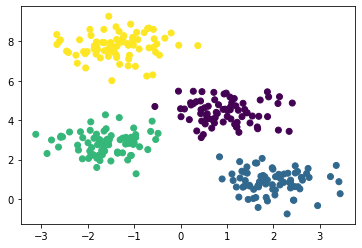

In [28]:
# 3 points
X,Y = make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=0)
plt.scatter(X[:,0],X[:,1],c=Y)

In [29]:
assert X.shape== (300,2)
assert Y.shape== (300,)

### Step 2: Create the helper functions
1. Implement ```square_diff``` that takes in two vectors ```x1``` and ```x2``` and returns their squared difference. Hint: Use ```assert``` to check their lenghts match.
2. Implement ```root_sum_squared``` that takes in a vector of squaerd differences and returns the square root of the summed elements.
3. Implement ```euclidean_distances``` that takes in feature and prediction vectors and computes the distances. *Hint:* ```np.linalg.norm```, it should give the same result as the previous 2 combined.
4. Implement ```evaluate``` that takes in ```y_hat``` and ```y_true``` (classifications of the blobs)and returns the accruacy of the KNN predict function.

In [30]:
# 3 points
def square_diff(x1, x2):
    distance = []
    for i, j in zip(x1, x2):
        distance.append((i-j)**2)
    return np.array(distance)


In [31]:

assert square_diff(X[0],X[1]).shape==(2,) 


assert square_diff(X[0],X[0])[0]== 0
assert square_diff(X[0],X[0])[1]== 0 

assert abs(square_diff(X[0],X[1])[0] - 5.06) < 0.05
assert abs(square_diff(X[0],X[1])[1]-  27.80) < 0.05


assert abs(square_diff(X[0],X[100])[0] - 2.03) < 0.05
assert abs(square_diff(X[0],X[100])[1]-  41.96) < 0.05



assert abs(square_diff(X[200],X[256])[0]- 3.30 ) < 0.05
assert abs(square_diff(X[200],X[256])[1]- 0.09 ) < 0.05

In [32]:
# 2 points
#implement root sum squares
def root_sum_squared(v1):
    return np.sqrt(sum([i for i in v1]))

In [33]:
v1 = root_sum_squared(square_diff(X[0],X[0]))
v2 = root_sum_squared(square_diff(X[0],X[1]))
v3 = root_sum_squared(square_diff(X[0],X[100]))
v4 = root_sum_squared(square_diff(X[200],X[256]))


assert v1 == 0
assert abs( v2 - 5.73) < 0.05
assert abs( v3 - 6.63) < 0.05
assert abs( v4 - 1.84) < 0.05

In [34]:
def euclidean_distances(v0,v1):
    return root_sum_squared(square_diff(v0,v1))

In [35]:
v1 = euclidean_distances(X[0],X[0])
v2 = euclidean_distances(X[0],X[1])
v3 = euclidean_distances(X[0],X[100])
v4 = euclidean_distances(X[200],X[256])


assert v1 == 0
assert abs( v2 - 5.73) < 0.05
assert abs( v3 - 6.63) < 0.05
assert abs( v4 - 1.84) < 0.05

In [36]:
# 3 points
#implement the evaluate function RETURN THE A VALUE BETWEEN 0 AND 1
def evaluate(y, y_p):
    count=0
    for i,v in zip(y,y_p):
        if i==v:
            count+=1
    return count/len(y)
    #return len([i for i,v in zip(y,y_p) if i==v])/len(y)
        

In [37]:
a = np.array([1,2,3])
b = np.array([1,2,3])
c = np.array([1,2,2])
d = np.array([2,2,2])

assert evaluate(a,b) == 1
assert 0.66 <= evaluate(a,c) <= 0.667
assert 0.33 <= evaluate(a,d) <= 0.34

### Step 3: Create the KNN prediction function
The KNN prediction function as the following steps
1. For each row in ```X``` calcuate the euclidian distance of each row to the target vector.
2. Combine the distances array with the target classifers array y.
3. Sort the array and select the k lowest pairs and get the categorical values of the k nearest and put in a list
4. Count the highest votes and update the highest voted class to y_hat

In [38]:
# 10 points
#Implement the KNN function that predicts the class for the test values using the train values
#OUTPUT MUST BE A NP ARRAY

def predict(x_test, x_true, y_true, k= 5):
    y_hat=[]
    for test in x_test:
        dist_list = [(i,euclidean_distances(x_true[i],test)) for i in range(0,len(x_true))]
        sl = sorted(dist_list, key=lambda x:x[1])
        k_list = [0]*k+[1]*(len(dist_list)-k)
        final_n = list(zip(sl,k_list))
        indexes = [i[0][0] for i in final_n if i[1]==0]
        y_hat.append(Counter(y_true[indexes]).most_common(1)[0][0])        
    return np.array(y_hat)
predictions = predict(x_test,x_train, y_train, k=3)
predictions

array([0, 1, 0, 1, 2, 2, 0, 2, 3, 3, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1,
       1, 2, 1, 3, 2, 3, 2, 1, 3, 3, 3, 2, 0, 3, 1, 2, 2, 1, 2, 3, 0, 3,
       2, 3, 1, 2, 0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0])

In [39]:
#1 point
from sklearn.model_selection import train_test_split
#tested with random state 0
#create the train test split test_size 0.2
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [40]:
assert x_train.shape == (240,2)
assert x_test.shape == (60,2)
assert y_train.shape == (240,)
assert y_test.shape == (60,)

In [41]:
predictions = predict(x_test,x_train, y_train, k=3)
assert predictions.shape == (60,)
assert evaluate(predictions, y_test) >= 0.95


In [42]:
# Extra point
predictions = predict(x_test,x_train, y_train, k=2)
assert predictions.shape == (60,)
assert evaluate(predictions, y_test) >= 0.95


In [43]:
print('Accuracy {:0.2f}%'.format( evaluate(predictions, y_test)*100 ))

Accuracy 100.00%
